# Important imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Loading  and exploring the data

In [2]:
df = pd.read_csv('../Raw_data/Thyroid_Diff.csv',sep=',')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [5]:
# Check for missing values
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [6]:
# Check for duplicate values
df.duplicated().sum()

19

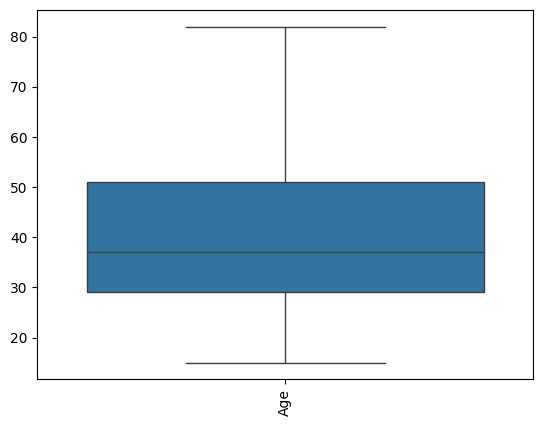

In [7]:
# check for outliers
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Data Preprocessing

## Handling missing values , duplicates and outliers

In [8]:
# The data show no missing values nor outliers but there are duplicates so lets remove them
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(364, 17)

## Define the categorical and numerical columns

In [10]:
# Define the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [11]:
# lets handle the categorical columns using Label Encoding
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [12]:
# Define the numerical columns
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
numerical_columns

Index(['Age'], dtype='object')

## Plotting the distribution of all the columns

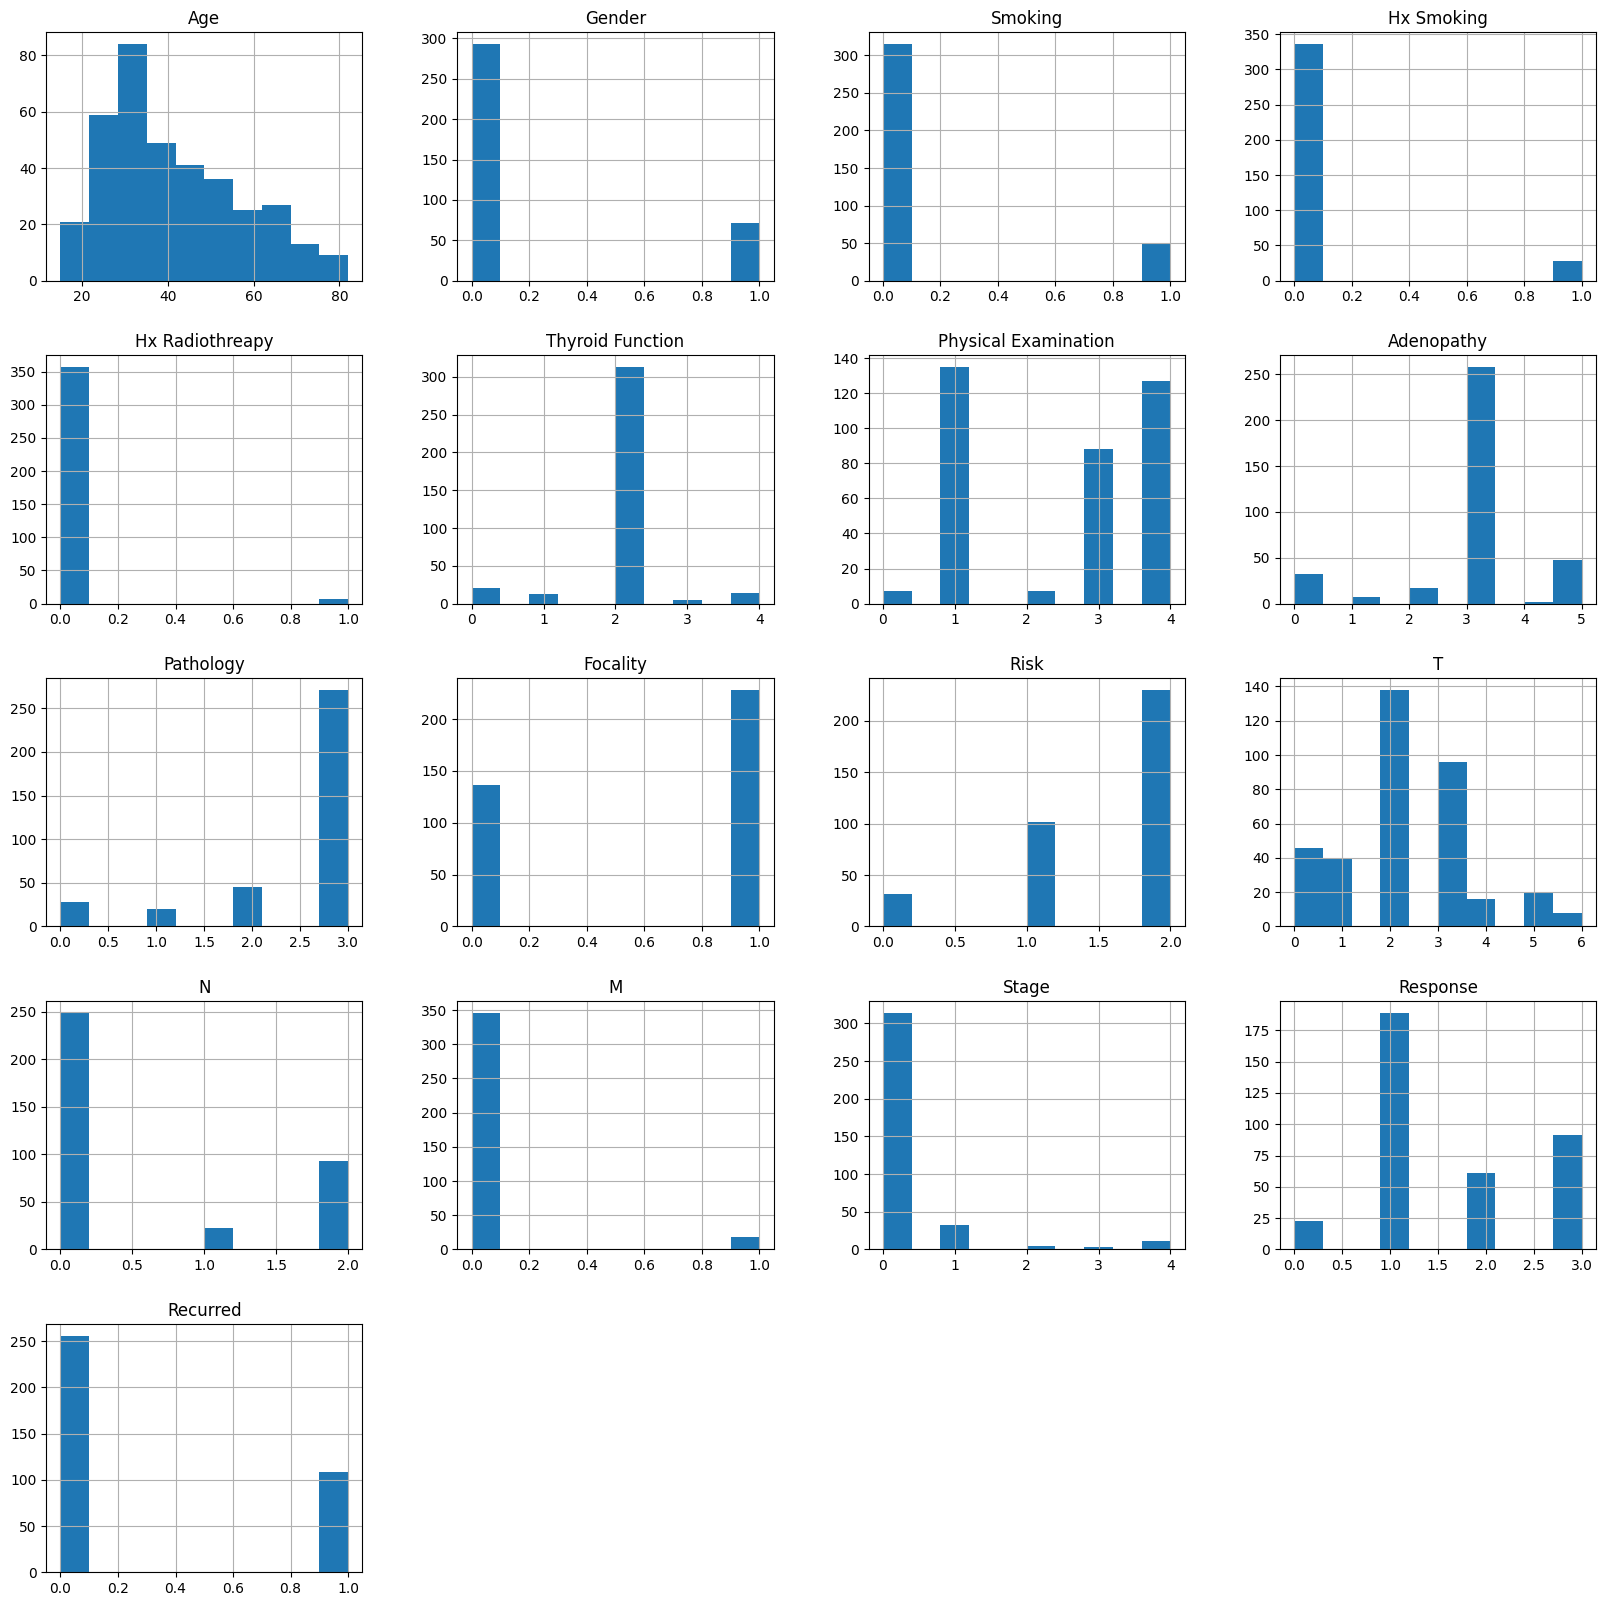

In [13]:
# plot the distribution of all columns
df.hist(figsize=(20,20))
plt.show()

# Saving the preprocessed data to a new csv file

In [14]:
# After preprocessing the data, we can save it to a new csv file
df.to_csv('../Processed_data/Thyroid_Diff.csv',index=False)